# Create CSV

In [113]:
import pandas as pd
import numpy as np

# Gerar dados simulados
np.random.seed(0)
n_samples = 100
renda = np.random.normal(loc=50000, scale=15000, size=n_samples)
compras = np.random.normal(loc=10, scale=5, size=n_samples)

# Criar DataFrame
df = pd.DataFrame({
    'Renda': renda,
    'Número de Compras': compras
})

# Salvar DataFrame em um arquivo CSV
df.to_csv('clientes.csv', index=False)

# Init

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.stats import zscore

In [115]:
df = pd.read_csv('clientes.csv')

In [116]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Renda', 'Número de Compras']])

# Visualização

In [117]:
desc_stats = df.describe()
print(desc_stats)

              Renda  Número de Compras
count    100.000000         100.000000
mean   50897.120233          10.410065
std    15194.396539           5.199397
min    11705.152762          -1.117016
25%    40342.149767           6.272851
50%    51411.441792          10.123274
75%    61056.160294          14.237399
max    84046.319360          21.915724


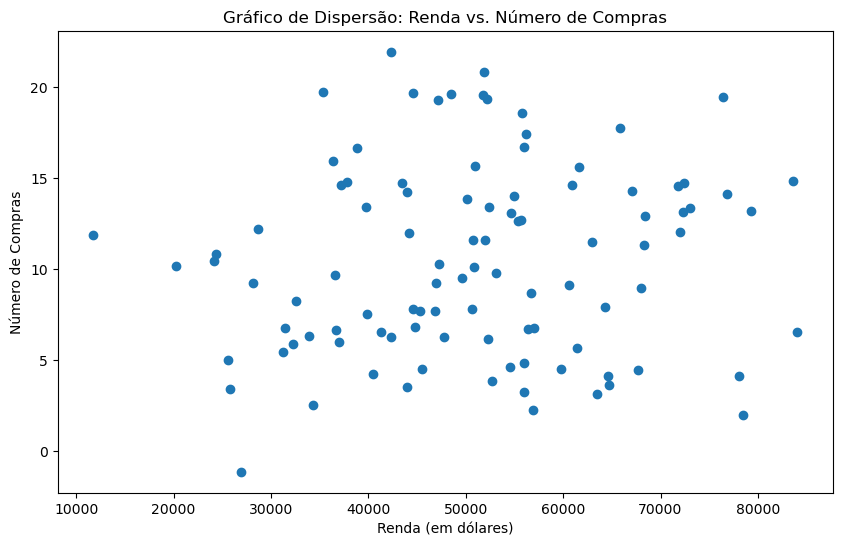

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Renda'], df['Número de Compras'])
plt.title('Gráfico de Dispersão: Renda vs. Número de Compras')
plt.xlabel('Renda (em dólares)')
plt.ylabel('Número de Compras')
plt.show()

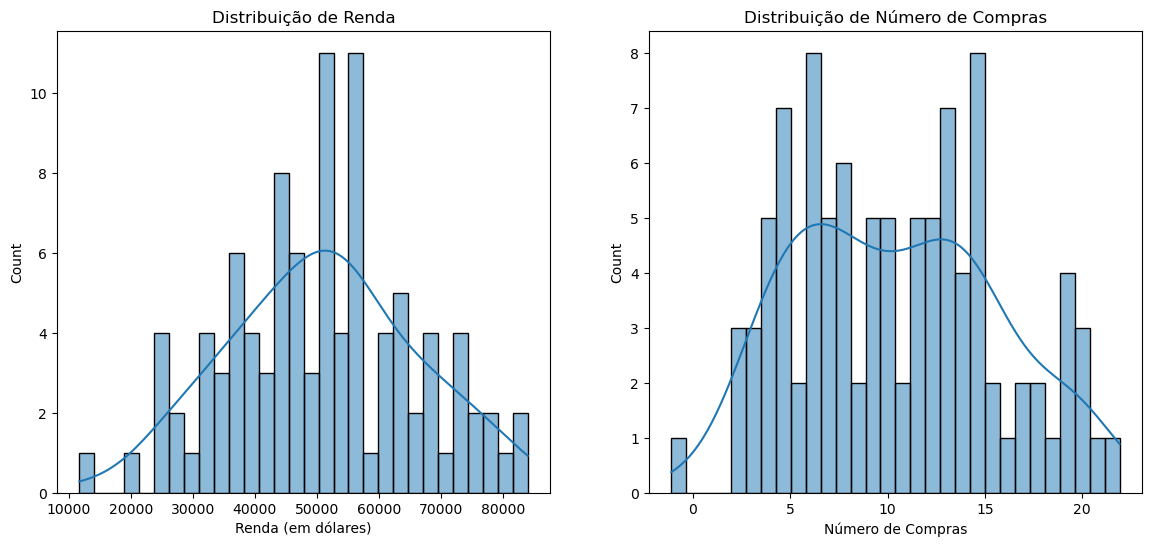

In [119]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Renda'], bins=30, kde=True)
plt.title('Distribuição de Renda')
plt.xlabel('Renda (em dólares)')

plt.subplot(1, 2, 2)
sns.histplot(df['Número de Compras'], bins=30, kde=True)
plt.title('Distribuição de Número de Compras')
plt.xlabel('Número de Compras')
plt.show()

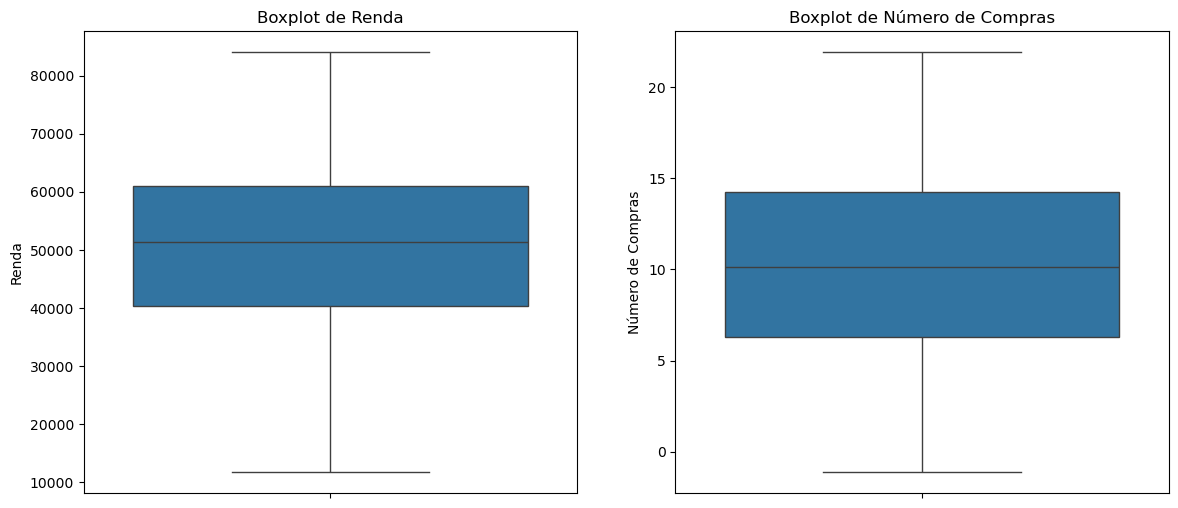

In [120]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Renda'])
plt.title('Boxplot de Renda')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Número de Compras'])
plt.title('Boxplot de Número de Compras')
plt.show()

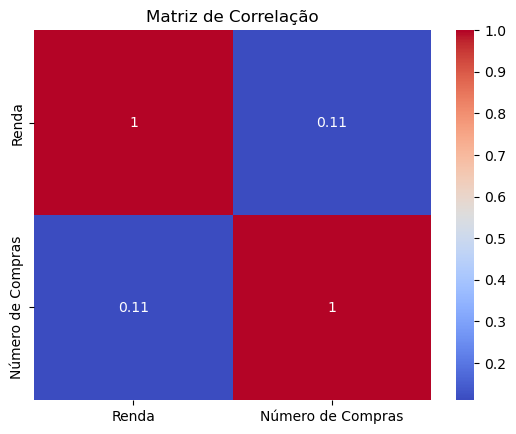

In [121]:
correlation_matrix = df[['Renda', 'Número de Compras']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Clusterização

In [122]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(df_scaled)

In [123]:
n_clusters = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)
n_noise = list(df['cluster']).count(-1)

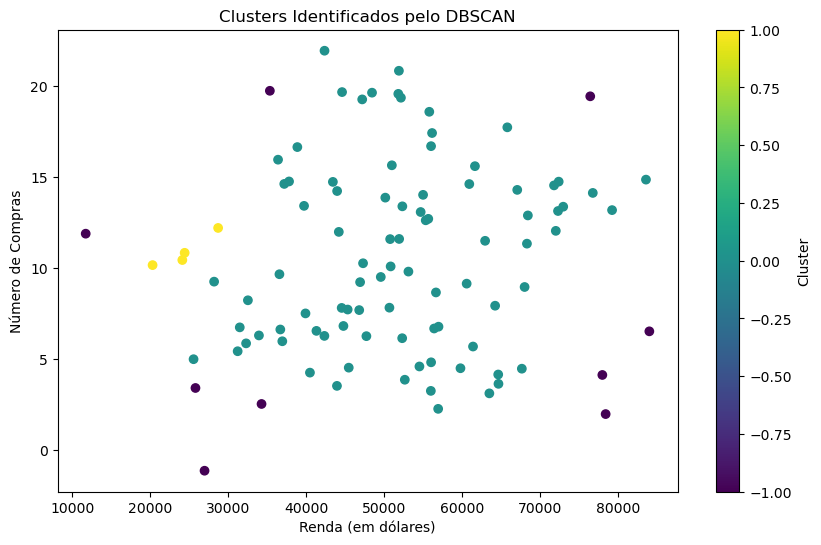

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Renda'], df['Número de Compras'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('Clusters Identificados pelo DBSCAN')
plt.xlabel('Renda (em dólares)')
plt.ylabel('Número de Compras')
plt.colorbar(label='Cluster')
plt.show()

In [125]:
# Filtrar os outliers
outliers = df[df['cluster'] == -1]

# Exibir os outliers
print(outliers)

           Renda  Número de Compras  cluster
0   76460.785190          19.415753       -1
4   78013.369852           4.134383       -1
5   35340.831802          19.718106       -1
20  11705.152762          11.882128       -1
24  84046.319360           6.527161       -1
40  34271.705524           2.543712       -1
48  25791.532287           3.420463       -1
83  26956.344706          -1.117016       -1
85  78438.337640           1.989712       -1


## Número de Clusters: 2 (amarelo e azul)
## Outliers: 9 (roxos, marcados como -1)